# Deep learning and Statistics

Early ancestors of modern convlutional neural networks (CNN) were proposed in 1960s and 70s. To name a few: Huber & Weisel [60s] and Fukushima's Neocognitron [70s] etc. 

These are mentioned as early heirarchical feature models for vision in many talks and artciles.

Deep Neural Networks (DNNs) can be loosly stated as "a series of parametrized nonlinear representations arranged hierarchically for different levels of abstractions and can be trained (massively) efficiently using stochastic gradient descent (SGD)"

In [8]:
from IPython.display import display, Math, Latex
display(Math(r' \Phi(x, \Theta) = \rho(W_L \rho(W_{L-1}( ..... \rho(W_1(x) .....  )    ) '))

<IPython.core.display.Math object>

where W's are convolutional tensor, p(.) is point wise nonlinearity

For supervised learing task, given a labelled data {X, Y}, optimize

In [9]:
display(Math(r' \hat{y_i}(\Theta) = softmax(\Phi(x, \Theta)) '))

<IPython.core.display.Math object>

In [10]:
display(Math(r' \Theta^* \leftarrow argmin_\Theta E(\Theta) = \sum_i L( \hat{y_i}(\Theta), y_i ) '))

<IPython.core.display.Math object>

It has too many number of parameters to be optimized.. hence, require larger resources... 

Good thing is that it can learn its features automatically. 
But in Black box manner, not much interpretability of learnt parameters.
Outputs are mostly point estimates. Noninferential.. Recently some tricks are used to get the uncertainities in the estimates: Such as Dropout at testtime.. 

Dont worry about nonconvex optimization issues. local minima does good. 

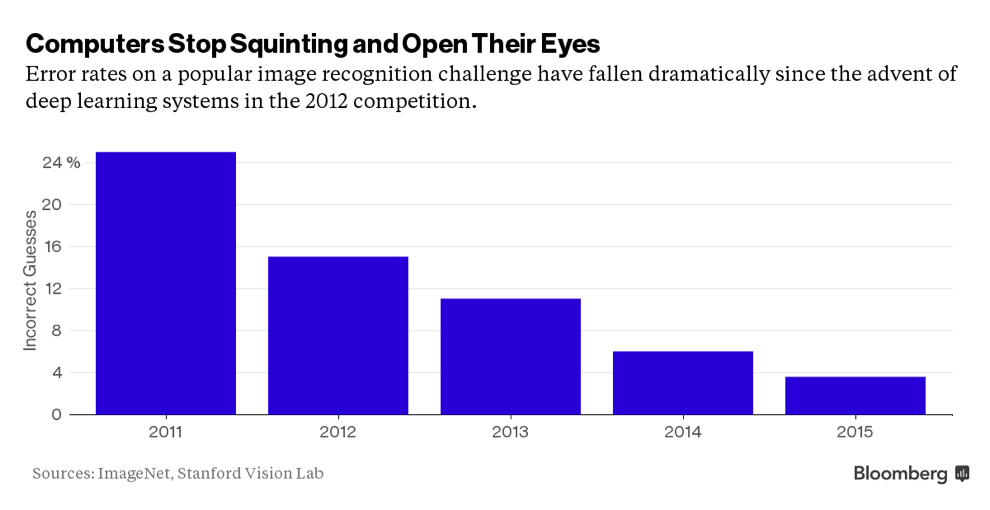

In [11]:
from IPython.display import Image
Image(filename='progress.png')

the above figure shows the progress in object detection field in the last 5 years after the advent of CNNs into Vision.

What made this progress possible?
tons of data.
large computational resources (GPUs)
better learning regularization schemes (eg dropout)
better optimization conditioning (eg Batch normalization)

Are these for a particular task or dataset?
No.. these are proved to be giving best results virtually in all tasks and on datasets. 

Nowadays, CNNs are everywhere.. 
They are getting used for object detection, for example, FasterRCNNs
and for semantic segmentation, for example Deeplab

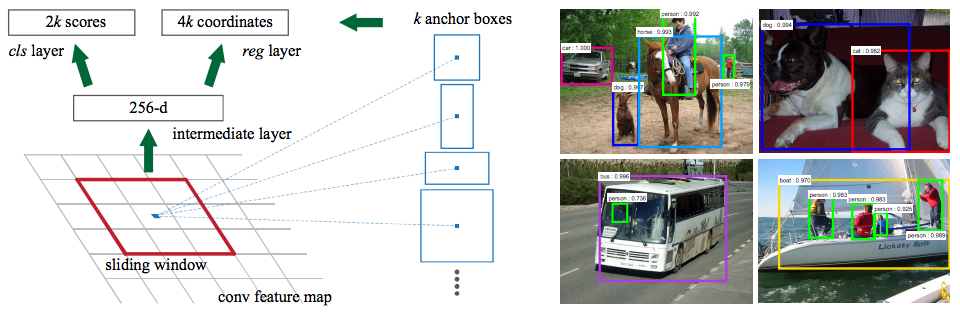

In [12]:
Image(filename='faster_rcnn.png')

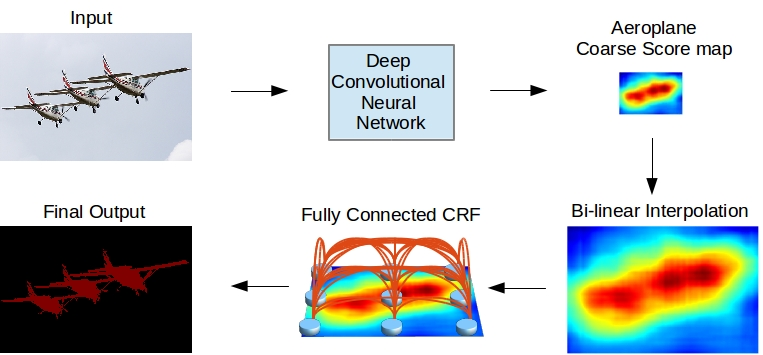

In [14]:
Image(filename='deeplab.jpg')

Beyond supervised learning, there is a lot of fascinating work going on in the fields of unsupervised learning.
For example Generative Adversarial Networks (GANs), Texture-Geometry Disentangling or Style transfer etc. 

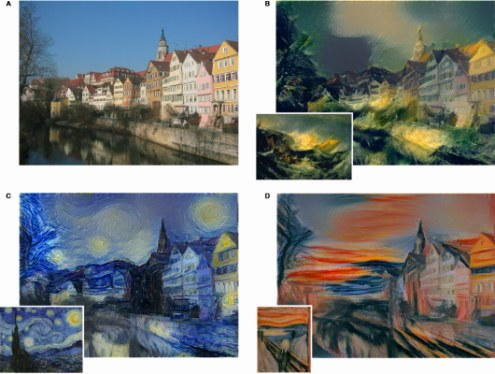

In [16]:
Image(filename='style.jpg')

Hence, CNNs seems to be capturing better image representations than previous models.
Now the questions are 
(a) Which archetectural choices might explain this advantage mathematically?

Role of nonlinearites, convolutions, depth, interplay with geometrical, class-specific invariants???????

(b)  which optimization choices might explain this advantage?

presence of local minima or saddle points?? equivalence of local solutions ? role of stochastic optimization? Role of normalization? 

So lets start with some theory behind DNNs:


# Deep learing approximation theory
deep networks define a class of universal approximators..

Theorem: Let $\rho(.)$ be bounded, non-constant function. Let $I_m$ denote m-dimensional hypercube, and $C(I_m)$ denote the space of continous function on $I_m$. given any $f \in C(I_m)$ and $\epsilon > 0$, there exists a $N>0$, and $v_i, W_i, b_i$, i=0,1..N, such that

$F(x) = \sum_{i<N}v_i\rho(W_i^T.x+b_i)$ satisfies 

$sup_{x\in I_m}|F(x) - f(x)| < \epsilon$


This guarantees that even single layer NN can approximate any classification problem in which the boundary is locally linear(smooth). However, it doesnot inform us that what archetectures are good. how it relates to optimization. 


# Deep learning Estimation theory

Theorem: The mean squared error b/w estimate network F and target network f can be bounded by

$O( \frac{Nm}{K}log(K) )  + O( \frac{C_f^2}{N} )$

where N is the number of nuerons in the network F, K is number of training point, m is the dimensions of input, $C_f$ a measure of global smoothness of f.

It combines approximation and estimation error,

but doesnot tell us about impact of choice of network architecture. 

# Statistical Learning theory
One can compute capacity of a NN by measuring how many configurations can be shattered (VC dimension) [Vapnik-Chervonenkis Dimension of Neural Nets].

The capacity of a NN (if measured by number of pieces in a piecewise linear approximation) increases exponentially with the depth [Montufar, Pascanu et al, ’14]. 

These results quantify the upper bousds of empirical risk of DNN.

But doesnot explain superior performance of CNN vs models with similar capacity. 